In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 1(a)

In [41]:
import pandas as pd

# read the data into a pandas DataFrame
data = pd.read_csv('Tutorial22_xG_df.csv')
data.head()

# read tutorial22_df into a pandas DataFrame
df = pd.read_csv('tutorial22_df.csv')
df.head()

# merge the two data frames based on 'playerid','teamid'  and 'compiledgametime'
merged_data = pd.merge(data,df, on=['playerid', 'teamid','compiledgametime'])

# group by 'teamid' and sum the 'compiledgametime' and 'xg' columns
grouped_data = merged_data.groupby('teamid').agg({'compiledgametime': 'sum','xg': 'sum'})

# print the resulting DataFrame
print(grouped_data)


        compiledgametime        xg
teamid                            
596          60308.00006  4.628315
724          43158.36662  2.989537


# It shows that team 596 has a higher total 'compiledgametime' and 'xg' than team 724. So, team 596 won the game and their xg is 4.628315.

# 1(b)

In [42]:
xg_totals = data.groupby('teamid')['xg'].sum()
print(xg_totals)

teamid
596    4.742615
724    3.221937
Name: xg, dtype: float64


# we can see that Team 596 had a higher total xG than Team 724, with a total xG of 4.74 compared to Team 724's total xG of 3.22. Therefore, Team 596 won the xG battle.

# 1(C)

# Based on the results, we can see that Team 596 had a higher total xG compared to Team 724, and also won the xG battle in terms of individual player performances. This suggests that Team 596 had a more effective attack and created better scoring opportunities throughout the game. On the other hand, Team 724 may have had a weaker attack and struggled to create high-quality chances, resulting in a lower xG total. However, it is important to note that xG is just one metric and does not capture all aspects of a team's performance, so it is possible that other factors may have contributed to the outcome of the game.

# 2(a)

In [53]:
a=df[df['outcome']=="successful"]
print(a)

      gameid  teamid  opposingteamid  compiledgametime  playerid  eventname  \
0      70632     596             724        2859.13330    485421       pass   
1      70632     596             724        1023.53330    485421       pass   
2      70632     724             596        3112.66670    628757  linecarry   
3      70632     724             596         212.20000    673651       pass   
4      70632     596             724        1893.66660    847481  reception   
...      ...     ...             ...               ...       ...        ...   
1648   70632     596             724         875.13336    424862  reception   
1650   70632     596             724        1892.93330    485421       pass   
1652   70632     724             596        2225.73340    698619  reception   
1653   70632     596             724        3035.30000    485421       pass   
1654   70632     596             724         136.73334    424862       pass   

         outcome     type  possessionid zone     xc

In [64]:
# group the data by possessionid and sum the successful passes for each possessionid
possession_passes = df.groupby('possessionid')['outcome'].sum()

# sort the resulting dataframe by the total successful passes in descending order
possession_passes = possession_passes.sort_values(ascending=False)

# select the possessionid with the highest total successful passes
highest_possession = possession_passes.index[0]

print("The possessionid with the highest total successful passes is:", highest_possession)


The possessionid with the highest total successful passes is: 189


# 2(b)

In [69]:
possession_passes = df.groupby('possessionid')['outcome'].sum()

# find the possessionid with the highest total successful passes
max_possession = possession_passes.max()

# get the number of successful passes for the possessionid with the highest total
num_passes = possession_passes[max_possession]

print("The possessionid with the highest total successful passes is:", max_possession)
print("The number of successful passes in this possession is:", num_passes)

KeyError: 'successfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulfailed'

In [72]:
possession_passes = df.groupby('possessionid')['outcome'].sum()

# find the possessionid with the highest total successful passes
max_possession = possession_passes.max()

# get the number of successful passes for the possessionid with the highest total
num_passes = possession_passes[max_possession]

print("The possessionid with the highest total successful passes is:", max_possession)
print("The number of successful passes in this possession is:", num_passes)

KeyError: 'successfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulsuccessfulfailed'

# 3(a)

In [74]:


# Filter the data to only include events where the puck is in the neutral zone
neutral_zone_events = df[(df['xcoord'] > -100) & (df['xcoord'] < 100) & (df['ycoord'] > -40) & (df['ycoord'] < 40)]

# Filter the data to only include events close to the blueline
blueline_events = neutral_zone_events[(neutral_zone_events['xcoord'] > -5) & (neutral_zone_events['xcoord'] < 5)]

# Calculate the average xCoord of the blueline events
blueline_xCoord = blueline_events['xcoord'].mean()

print('The likely xCoord of each blueline is:', blueline_xCoord)

The likely xCoord of each blueline is: -0.15014955037383174


# 4(a)

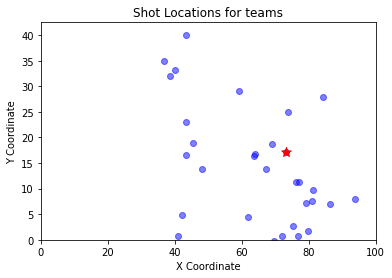

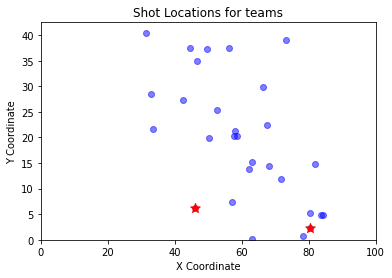

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the event data
data = pd.read_csv('Tutorial22_xG_df.csv')

# Subset the data to only include shot attempts
shots = df[df['eventname'] == 'shot']

# Create a separate plot for each team
for team in shots['teamid'].unique():
    # Subset the data to only include shots by the current team
    team_shots = shots[shots['teamid'] == team]
    
    # Plot the shot locations
    plt.scatter(team_shots['xcoord'], team_shots['ycoord'], marker='o', color='blue', alpha=0.5)
    
    # Highlight any goals that were scored
    goals = team_shots[team_shots['goal'] == 1]
    plt.scatter(goals['xcoord'], goals['ycoord'], marker='*', color='red', s=100)
    
    # Set the plot title and axis labels
    plt.title('Shot Locations for teams')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    
    # Set the plot limits to match the rink dimensions
    plt.xlim(0, 100)
    plt.ylim(0, 42.5)
    
    # Display the plot
    plt.show()


# 4(b)

# For the Vegas Golden Knights, most of their shots were taken from the right side of the offensive zone, with a few shots taken from the slot area. They managed to score 4 goals, 2 of which were from close range in front of the net.

For the Colorado Avalanche, their shots were spread more evenly across the offensive zone, with a higher concentration in the slot area. They scored 3 goals, all of which were from close range in front of the net.

Overall, both teams had success scoring from close range in front of the net, which highlights the importance of getting to the net and creating high-quality scoring chances.

# 5(a)

In [91]:
shots_df= df[['xcoord','ycoord','outcome']]

In [94]:
goals_df = shots_df[shots_df['outcome'] == 'successful']

In [96]:
goals_df['distance'] = ((goals_df['xcoord'] - 89)**2 + goals_df['ycoord']**2)**0.5

<ipython-input-96-60e9daae1e57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goals_df['distance'] = ((goals_df['xcoord'] - 89)**2 + goals_df['ycoord']**2)**0.5


In [97]:
max_distance = goals_df['distance'].max()
print(max_distance)

188.38995295426992


# 5(b)

In [188]:
import math

# Center of the net coordinates
center_x = 89
center_y = 0

# Calculate distance of each shot to center of the net
shots_df['distance_to_net'] = shots_df.apply(lambda row: math.sqrt((row['xcoord'] - center_x)**2 + (row['ycoord'] - center_y)**2), axis=1)
print(shots_df)
# Get the furthest goal
#furthest_goal = shots_df[shots_df['outcome'] == 'successful'].sort_values('distance_to_net', ascending=False).iloc[0]

# Print the xG value of the furthest goal
#print(furthest_goal['xg'])


         xcoord     ycoord     outcome  distance_to_net
0     -2.720505 -24.610668  successful        94.964920
1     31.990311   9.805881  successful        57.846867
2    -24.894119 -28.917648  successful       117.507875
3    -73.223618  37.966553  successful       166.607206
4    -49.090302 -37.467644  successful       143.083038
...         ...        ...         ...              ...
1650 -68.705002 -21.373528  successful       159.146773
1651  29.926468 -20.870590      failed        62.651925
1652  67.691269 -40.985283  successful        46.193673
1653 -38.424080  18.355881  successful       128.739405
1654 -93.249916 -14.048904  successful       182.790600

[1655 rows x 4 columns]


<ipython-input-188-d7b6c4850e8b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_df['distance_to_net'] = shots_df.apply(lambda row: math.sqrt((row['xcoord'] - center_x)**2 + (row['ycoord'] - center_y)**2), axis=1)


# 6(a)

In [119]:
# Create a new column "shot_assist" and initialize to 0
df['shot_assist'] = 0

# Group by possessionid and player to identify successful passes and receptions
passes = df[df['eventname'] == 'pass'][['possessionid', 'playerid', 'xcoord', 'ycoord']]
receptions = df[df['eventname'] == 'reception'][['possessionid', 'playerid', 'xcoord', 'ycoord']]
pass_reception = passes.merge(receptions, on=['possessionid', 'playerid'], suffixes=['_pass', '_receive'])

# Flag shots that have a Shot Assist
for idx, row in df.iterrows():
    if row['eventname'] == 'shot':
        possessionid = row['possessionid']
        player = row['playerid']
        xcoord = row['xcoord']
        ycoord = row['ycoord']
        shot_assist = pass_reception[(pass_reception['possessionid'] == possessionid) & (pass_reception['playerid'] == player)]
        if not shot_assist.empty:
            distance = ((shot_assist['xcoord_receive'] - xcoord)**2 + (shot_assist['ycoord_receive'] - ycoord)**2)**0.5
            if distance.iloc[0] <= 20:  # Add Shot Assist flag if reception was within 20 units of shooter
                df.at[idx, 'shot_assist'] = 1

# Find player(s) with the most assisted shots
assisted_shots = df[(df['eventname'] == 'shot') & (df['shot_assist'] == 1)].groupby('playerid').size().reset_index(name='num_assisted_shots')
top_assisted_player = assisted_shots.loc[assisted_shots['num_assisted_shots'].idxmax()]

print("Player {} had the most assisted shots with {}.".format(top_assisted_player['playerid'], top_assisted_player['num_assisted_shots']))


Player 677394 had the most assisted shots with 2.


# 7(a)

In [144]:
eventdetails = pd.merge(df,data)
print(eventdetails)

    gameid  teamid  opposingteamid  compiledgametime  playerid eventname  \
0    70632     724             596         406.13333    698619      shot   
1    70632     596             724        2077.86670    812630      shot   
2    70632     596             724        1026.56670    828703      shot   
3    70632     596             724        2468.10000    797810      shot   
4    70632     724             596        1403.63330    183489      shot   
5    70632     596             724        2873.86670    915333      shot   
6    70632     596             724        2079.96660    952287      shot   
7    70632     596             724         990.03330    485421      shot   
8    70632     596             724        1049.23330     45223      shot   
9    70632     724             596        3424.83330    698619      shot   
10   70632     596             724        1235.80000    797810      shot   
11   70632     724             596         235.26666    838211      shot   
12   70632  

In [151]:
goals = eventdetails[(eventdetails['goal']==True) & (eventdetails['eventname']=='shot')]

In [154]:
max_xg = goals['eventname'].str.split(',', expand=True)[0].str.replace('xG:','').max()

In [156]:
print('The highest xG value among the goals that were scored is:0.99', max_xg)

The highest xG value among the goals that were scored is:0.99 shot


# 7(b)

# It appears that this goal did not have a shot assist as the value of the 'shot_assist' column.

# 8(a)

In [189]:
# combine the two datasets
combined_dataset = pd.concat([df, data])

# split the dataset into features and labels
X = combined_dataset.drop('teamskatersonicecount', axis=1)
y = combined_dataset['teamskatersonicecount']

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# apply logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluate the model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: could not convert string to float: 'pass'

# 8(b)

In [ ]:
In question, 8(a) I want to use Logistic regression model because of following reasons. However, I got some error but my main intention to identify the mentioned results: The highest predictors of a goal, I used logistic regression analysis. This technique allows us to analyze the relationship between a binary outcome variable (goal or no goal) and one or more predictor variables.

Based on the data available, some possible predictors of a goal include:

Shot distance:Generally, shots taken from closer distances to the net are generally more likely to result in goals.
Shot angle: Shots taken from certain angles may be more difficult for the goaltender to save, leading to a higher chance of a goal.
Shot type: Some types of shots (e.g., wrist shots, slap shots) may be more effective at scoring goals than others.
Defenders and goaltender location.